# Time series

Lecture des données

In [18]:
import pandas as pd


df = pd.read_csv("data_beijing.csv")

In [19]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


Convertissez les colonnes year, month, day, hour en une seule colonne de type datetime à mettre en index

In [20]:
# a partir des colonnes year, month, day, hour
df["date"] = pd.to_datetime(df[["year", "month", "day", "hour"]])
df["date"].head()

0   2010-01-01 00:00:00
1   2010-01-01 01:00:00
2   2010-01-01 02:00:00
3   2010-01-01 03:00:00
4   2010-01-01 04:00:00
Name: date, dtype: datetime64[ns]

In [21]:
df.set_index("date", inplace=True)

Affichez la pollution au cours du temps (pm2.5)

<Axes: xlabel='date'>

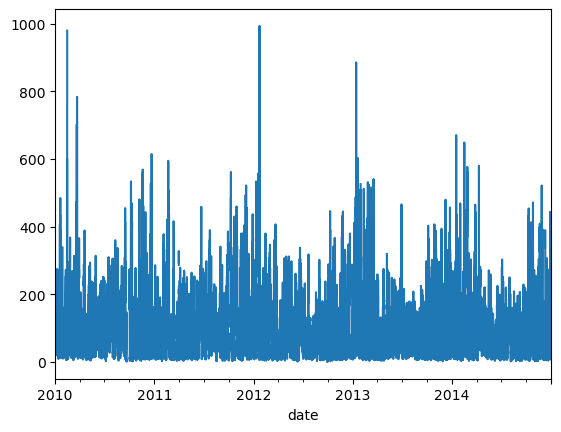

In [6]:
df["pm2.5"].plot()

Nettoyez les valeurs manquantes de pollution avec une de ces trois méthodes de pandas
- bfill
- ffill
- interpolate

Sur quelle période s'étale la série ? Quelle est sa fréquence ? 

Quelle est la valeur moyenne de la pollution ? Sa volatilité (std) ? Son min / max ? 

Pour le moment on ne s'intéresse qu'à la colonne pm2.5 (*vision univariée*).

A vue d'oeil, est ce que la série est stationnaire ? 

Testez la stationnarité avec un test ADF. 

Quelle est l'hypothèse HO ? 
Que pouvez vous conclure ? 

In [7]:
# test adf

from statsmodels.tsa.stattools import adfuller
result = adfuller(df["pm2.5"].dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -20.60682464640377
p-value: 0.0


Décomposez la série en trois composantes : 

- trend
- seasonality
- noise

(statsmodels : seasonal decompose)

Est ce que vous voyez des valeurs étonnantes ? Vous pouvez investiguer en faisant un graphique interactif avec plotly.

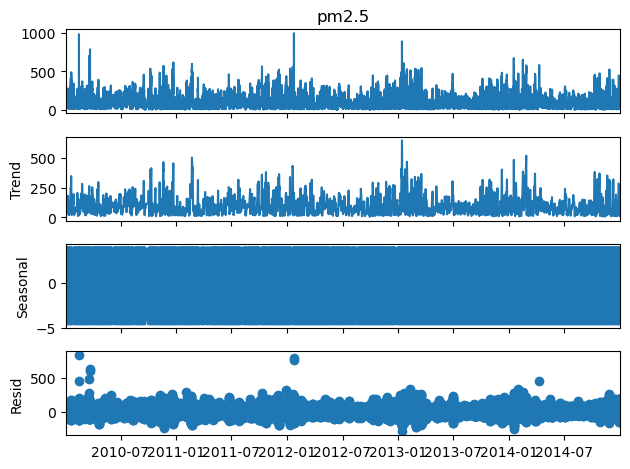

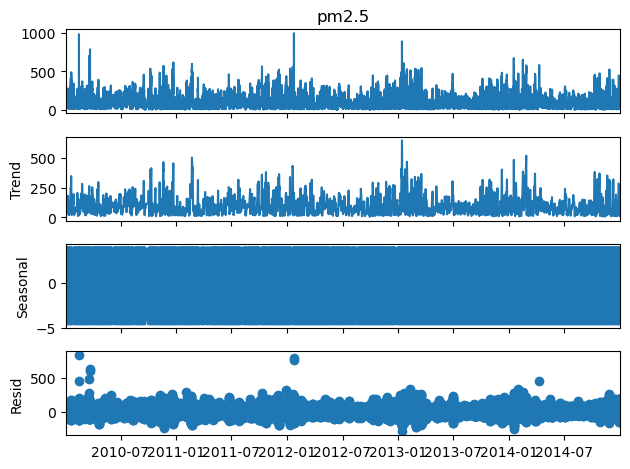

In [13]:
# plot seasonl decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["pm2.5"].dropna(), model='additive', period=24)
result.plot()

Tracez le graphique de la relation entre pm2.5 et ses lags d'ordre 1 à 6 (pandas : lag)

Vérifiez l'autocorrélation (partielle et non partielle de la série) de manière graphique (acf et pacf)

statsmodels.graphics : pacf, acf

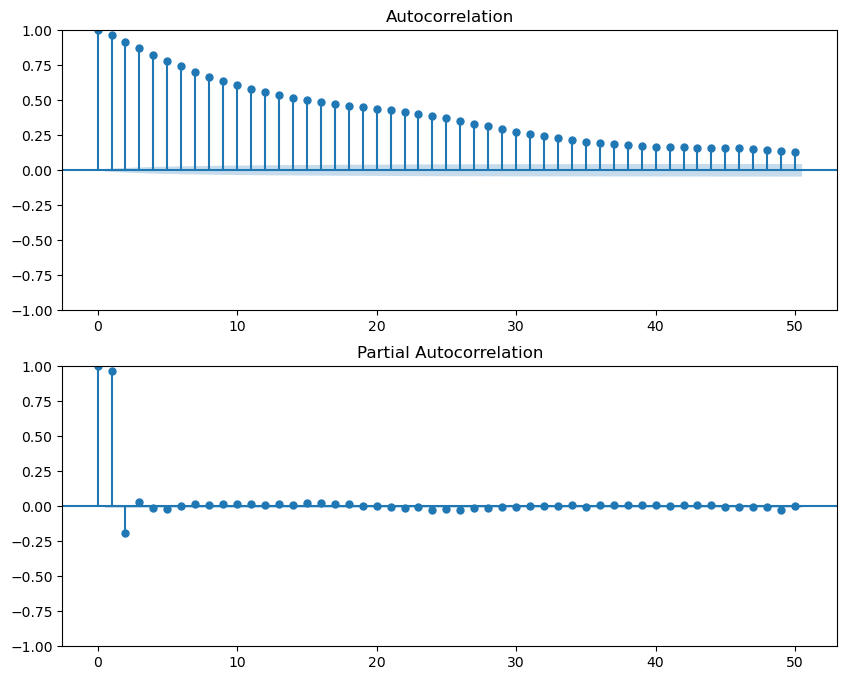

In [14]:
# acf et pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1, figsize=(10,8))
plot_acf(df["pm2.5"].dropna(), ax=ax[0], lags=50)
plot_pacf(df["pm2.5"].dropna(), ax=ax[1], lags=50)
plt.show()

Séparez le jeu de données en train et test en testant sur les 6 derniers mois des données.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43824 entries, 2010-01-01 00:00:00 to 2014-12-31 23:00:00
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.7+ MB


Modélisez la série avec un modèle AR dont vous choisirez l'ordre en fonction des graphiques d'autocorrélation.

Mesurez la performance avec le RMSE sur le jeu de test et de train.

Modélisez la série avec un modèle ARIMA dont vous choisirez les ordres en fonction des graphiques d'autocorrélation précédents

Quel est le meilleur modèle ? 